In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Data Preprocessing

Loading DataFrames

In [2]:
pd.set_option('display.max_columns', None)
df1= pd.read_csv("student-mat.csv", sep=';')
df2= pd.read_csv("student-por.csv", sep=';')

In [3]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
df= pd.concat([df1, df2], axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [9]:
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


Data Cleaning and Exploration

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                1044 non-null   int64
 1   age                1044 non-null   int64
 2   address            1044 non-null   bool 
 3   famsize            1044 non-null   int64
 4   Pstatus            1044 non-null   int64
 5   Medu               1044 non-null   bool 
 6   Fedu               1044 non-null   bool 
 7   traveltime         1044 non-null   int64
 8   studytime          1044 non-null   bool 
 9   failures           1044 non-null   int64
 10  schoolsup          1044 non-null   int64
 11  famsup             1044 non-null   int64
 12  paid               1044 non-null   int64
 13  activities         1044 non-null   int64
 14  nursery            1044 non-null   int64
 15  higher             1044 non-null   bool 
 16  internet           1044 non-null   bool 
 17  romantic           1

In [37]:
df.describe()

,sex,age,famsize,Pstatus,traveltime,failures,schoolsup,famsup,paid,activities,nursery,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.433908,16.726054,0.293103,0.884100,1.522989,0.264368,0.113985,0.613027,0.210728,0.494253,0.799808,0.355364,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,0.779693
std,0.495850,1.239975,0.455404,0.320259,0.731727,0.656142,0.317945,0.487291,0.408021,0.500207,0.400335,0.478853,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,0.414652
min,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000
50%,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000
75%,1.000000,18.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000
max,1.000000,22.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000


In [10]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [13]:
binary_cols = ['sex', 'address', 'famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic']
binary_cols

['sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [14]:
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
multi_class_cols = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                1044 non-null   int64
 1   age                1044 non-null   int64
 2   address            1044 non-null   int64
 3   famsize            1044 non-null   int64
 4   Pstatus            1044 non-null   int64
 5   Medu               1044 non-null   int64
 6   Fedu               1044 non-null   int64
 7   traveltime         1044 non-null   int64
 8   studytime          1044 non-null   int64
 9   failures           1044 non-null   int64
 10  schoolsup          1044 non-null   int64
 11  famsup             1044 non-null   int64
 12  paid               1044 non-null   int64
 13  activities         1044 non-null   int64
 14  nursery            1044 non-null   int64
 15  higher             1044 non-null   int64
 16  internet           1044 non-null   int64
 17  romantic           1

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

In [18]:
# Extract only correlations with G3
g3_corr = corr_matrix[["G3"]].sort_values(by="G3", ascending=False)

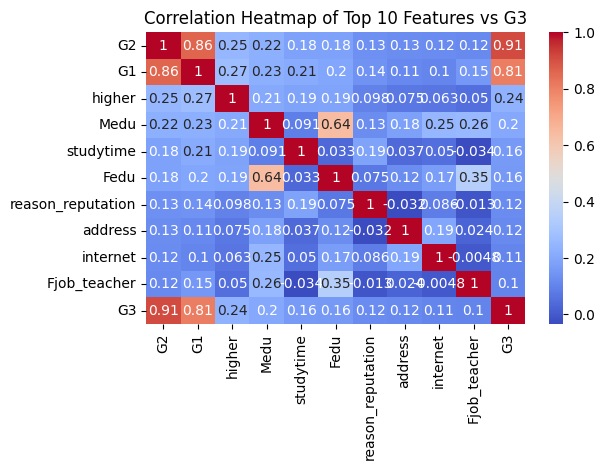

In [19]:
# Plot heatmap for top 10 correlated features
top_features = g3_corr[1:11].index.tolist() + ["G3"]  # Exclude G3's correlation
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Top 10 Features vs G3")
plt.tight_layout()
plt.show()

2.Feature selection/engineering and data splitting

In [20]:
top_features

['G2',
 'G1',
 'higher',
 'Medu',
 'studytime',
 'Fedu',
 'reason_reputation',
 'address',
 'internet',
 'Fjob_teacher',
 'G3']

In [21]:
# Target: create binary 'pass' column from G3
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [22]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,pass
0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0
1,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0
2,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,False,False,False,False,False,False,True,False,False,False,True,False,True,False,1
3,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,False,True,False,False,False,False,False,True,False,True,False,False,True,False,1
4,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,False,False,True,False,False,False,True,False,False,True,False,False,False,False,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                1044 non-null   int64
 1   age                1044 non-null   int64
 2   address            1044 non-null   int64
 3   famsize            1044 non-null   int64
 4   Pstatus            1044 non-null   int64
 5   Medu               1044 non-null   int64
 6   Fedu               1044 non-null   int64
 7   traveltime         1044 non-null   int64
 8   studytime          1044 non-null   int64
 9   failures           1044 non-null   int64
 10  schoolsup          1044 non-null   int64
 11  famsup             1044 non-null   int64
 12  paid               1044 non-null   int64
 13  activities         1044 non-null   int64
 14  nursery            1044 non-null   int64
 15  higher             1044 non-null   int64
 16  internet           1044 non-null   int64
 17  romantic           1

In [24]:
df[['G1', 'G2', 'G3']].head()  # Force display G1 and G2

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [26]:
df.drop(columns='G3', inplace=True)

In [27]:
cols_to_convert = ['G2', 'G1', 'higher', 'Medu', 'studytime', 'Fedu', 'address', 'internet']
df[cols_to_convert] = df[cols_to_convert].astype(bool)

In [42]:
#Split the data
#Feature matrix
features=df[['G2','G1','higher','Medu','studytime','Fedu','reason_reputation','address','internet','Fjob_teacher']]
X=features

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   G2                 1044 non-null   bool 
 1   G1                 1044 non-null   bool 
 2   higher             1044 non-null   bool 
 3   Medu               1044 non-null   bool 
 4   studytime          1044 non-null   bool 
 5   Fedu               1044 non-null   bool 
 6   reason_reputation  1044 non-null   bool 
 7   address            1044 non-null   bool 
 8   internet           1044 non-null   bool 
 9   Fjob_teacher       1044 non-null   bool 
dtypes: bool(10)
memory usage: 18.4 KB


In [44]:
#Target vector
target=df['pass']
y=target

In [45]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1044 entries, 0 to 648
Series name: pass
Non-Null Count  Dtype
--------------  -----
1044 non-null   int64
dtypes: int64(1)
memory usage: 16.3 KB


In [46]:
# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

3. Model training using at least two ML algorithms (e.g., logistic regression, decision trees, etc.)

In [38]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

In [49]:
log_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [50]:
tree_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

4. Evaluate the models using appropriate metrics (e.g., accuracy, F1-score, confusion matrix) and choose the better model

In [53]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("F1 Score:", f1_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))

Logistic Regression:
Accuracy: 0.7368421052631579
F1 Score: 0.8414985590778098
Confusion Matrix:
 [[  8  52]
 [  3 146]]

Decision Tree:
Accuracy: 0.7416267942583732
F1 Score: 0.8411764705882353
Confusion Matrix:
 [[ 12  48]
 [  6 143]]


Decision tree is the better model